# Altering the frequency of the input

First run the ```simple_network_creation.ipynb``` so that you have a ```networks/simple_example``` folder in the ```example/notebooks``` folder with the small network.

In [1]:
import os
from snudda.input import SnuddaInput
network_path = os.path.join("networks","simple_example")
si = SnuddaInput(network_path=network_path, 
                 input_config_file=os.path.join("input_config","simple-input-2.json"),
                 verbose=False)
si.generate()

Load done. 0.007130202022381127
Writing spikes to networks/simple_example/input-spikes.hdf5


In [2]:
from snudda.plotting.plot_input import PlotInput
input_file = os.path.join(network_path, "input-spikes.hdf5")
spi = PlotInput(input_file)

Loading networks/simple_example/network-pruned-synapses.hdf5
Loading config data from HDF5
200 neurons with 24514 synapses and 0 gap junctions
Load done. 0.03166933008469641


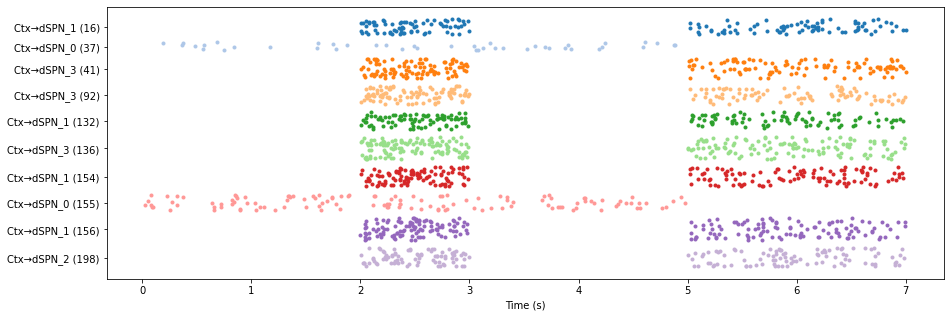

In [3]:
spi.plot_input("dSPN", 10, fig_size=(15,5))

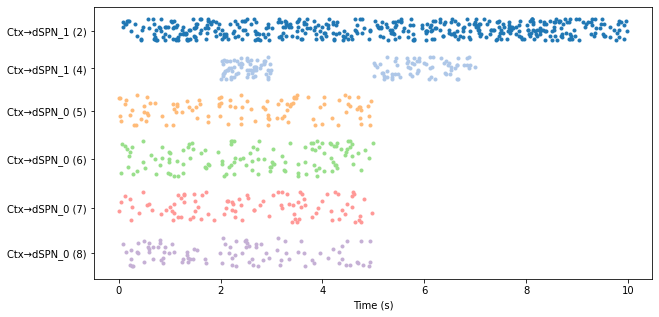

In [4]:
spi.plot_input_to_target([2,4,5,6,7,8])